In [1]:
using NCDatasets
using Plots, ColorSchemes
using DataFrames, CSV
using SparseArrays, LinearAlgebra
using LaTeXStrings

In [12]:
winter = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/endpoints/Wi100y_230827_1345_ep.nc")
summer = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/endpoints/Su100y_230827_1710_ep.nc")

Dataset: /home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/endpoints/Su100y_230827_1710_ep.nc
Group: /

Dimensions
   np = 4
   nb = 7
   nz = 3
   nn = 1
   nd = 4
   no = 1
   ndepth = 89
   ndepth1 = 90
   nrec = 732001
   nprey = 11

Variables
  p   (89 × 4)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × np
    Attributes:
     units                = mmol/m3 N biomass

  b   (89 × 7)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nb
    Attributes:
     units                = mmol/m3 N biomass

  z   (89 × 3)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nz
    Attributes:
     units                = mmol/m3 N biomass

  n   (89 × 1)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nn
    Attributes:
     units                = mmol/m3 N OM

  d   (89 × 4)
    Datatype:    Float64 (Float64)
    Dimensions:  ndepth × nd
    Attributes:
     units                = mmol/m3 N OM

  pIC   (89 × 4)
    Datatype:    Float64 (Flo

In [13]:
function get_endpoints(ds, vars)

    out = Vector{Any}()

    for v in vars
        append!(out, [ds["$v"][:,:,end]])
    end

    return out[1], out[2], out[3], out[4], out[5]

end

function get_nonzero_axes(M)

    Cs = sparse(M)
    (II, JJ, _) = findnz(Cs) 
    
    return II, JJ

end 

function get_temp_mod(season)
    #fit to SPOT data (approx 20 to 4, approx 16 to 4)
    if season == "Win"
        temp_mod = CSV.read("/home/lee/Dropbox/Development/NPZBD_1D/data/temp_mod/win_temp_mod.csv", DataFrame)
    else
        temp_mod = CSV.read("/home/lee/Dropbox/Development/NPZBD_1D/data/temp_mod/sum_temp_mod.csv", DataFrame)
    end

    return Matrix(temp_mod)
end

get_temp_mod (generic function with 1 method)

In [17]:
function calc_growthB(B, D, ds, season)

    II, JJ = get_nonzero_axes(ds["CM"][:])
    vmax = ds["vmax_ij"][:]
    Km = ds["Km_ij"][:]
    y = ds["y_ij"][:]
    temp_fun = get_temp_mod(season)

    growth = Any[]

    for j = axes(II, 1)
        uptake = vmax[II[j],JJ[j]] .* D[:,II[j]] ./ (D[:,II[j]] .+ Km[II[j],JJ[j]])
        yield = y[II[j],JJ[j]]
        push!(growth, uptake .* yield)
    end

    return growth

end

calc_growthB (generic function with 1 method)

In [15]:
# Get endpoints 
Nw, Pw, Zw, Bw, Dw = get_endpoints(winter, ["n", "p", "z", "b", "d"])
Ns, Ps, Zs, Bs, Ds = get_endpoints(summer, ["n", "p", "z", "b", "d"])

([0.2517931644226191; 0.2546302631240294; … ; 22.799995559614068; 22.80005741510265;;], [0.12560919191902867 1.4570210759795928e-305 0.276794614761639 9.238638523430925e-305; 0.12592740750188855 1.4560823749166041e-305 0.27679858254957335 9.206090999324957e-305; … ; 1.3185127270844423e-21 2.224499381906088e-305 1.4035621379456615e-21 2.2252190428553318e-305; 1.3020399557381034e-21 2.2247343932519256e-305 1.3860268059941277e-21 2.2237701896083135e-305], [0.07874831969758135 0.007785375376058316 0.05551464551879135; 0.07879474279971013 0.007786460864879804 0.05551417280462542; … ; 5.334752330779869e-9 1.952694167199353e-8 9.991304619864408e-7; 5.32801158869725e-9 1.9508417966950498e-8 9.980264450810773e-7], [0.06065031183143572 0.051099076178812694 … 0.11437998430601064 4.944718727210576e-105; 0.06078438597934881 0.05103274213279794 … 0.11438650624317831 4.984918617034542e-105; … ; 0.00836962398965177 0.0013286006105478088 … 0.001419452745110056 4.688777160563189e-99; 0.00838568318794645

In [18]:
growthB = calc_growthB(Bw, Dw, winter, "Win")

7-element Vector{Any}:
 [0.17309778401806156, 0.17807119972682442, 0.18281575751917767, 0.18700370768880512, 0.19027343243050082, 0.19224083309922635, 0.19250921388688602, 0.19068450991878283, 0.18641057127970093, 0.17944270445488447  …  0.03661947663198938, 0.04001972331219619, 0.043646523519696646, 0.04744719396177424, 0.05136730549126244, 0.05535342326331695, 0.059355349645680656, 0.063327773182576, 0.06723131489740958, 0.0710330283359126]
 [0.11772911980633041, 0.11772184773113395, 0.11770138757547915, 0.11765857976640193, 0.11757975867213417, 0.11744525793915794, 0.11722776045343551, 0.1168905814669498, 0.11638589774961224, 0.11565275490704248  …  0.0017188803003534633, 0.0017215865334877884, 0.0017238039733134933, 0.0017255885288100744, 0.001726992356172355, 0.001728063769193386, 0.00172884720458424, 0.0017293832403716845, 0.0017297086639018638, 0.001729856584481504]
 [0.13625237255753006, 0.1364210005146556, 0.13654349066389698, 0.1362641767823564, 0.13509836703483702, 0.1324952

In [19]:
CMd = display(winter["CM"][:])

4×7 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0  1.0  0.0  0.0

In [30]:
function plot_growth_over_D(growth, biomass, R, lb, R_str)

    depth = 400
    dz = Int(depth/10)
    zc = get_zc(depth)
    l = @layout [a{0.9h} b{0.3w}]

    p1 = plot(R[1:dz], growth[1][1:dz], lw=4, lc="olivedrab3", label=lb[1], ylabel="Growth Rate", xrotation=45, 
    xlabel=L" D (mmol/m^3)", border=:box, title="Growth vs. $R_str")
    cmp = cgrad(:coolwarm, categorical = true)
    for i in 2:length(growth)
        plot!(R[1:dz], growth[i][1:dz], lw=4, palette=cmp, label=lb[i])
    end

    p2 = plot(biomass[1][1:dz], -zc, lw=4, lc="olivedrab3", label=lb[1], xrotation=45, xlabel=L"mmol/m^3", ylabel="Depth (m)", title="OM Conc.")
    for j in 2:length(biomass)
        plot!(biomass[j][1:dz], -zc, lw=4, palette=cmp, label=lb[j])
    end
    plot!(R[1:dz], -zc, lw=4, lc="purple4", ls=:dot, label="$R_str")

    f = plot(p1, p2,
    fg_legend = :transparent,
    size=(500,350),
    layout = l,
    )

    return f

end

function get_zc(depth)

    zc = [10/2:10:(depth-10/2)]

    return zc

end

get_zc (generic function with 1 method)

In [133]:
println(maximum(growthB[3][1:40]), " ", maximum(growthB[6][1:40]))
display(winter["vmax_ij"][:])

4×7 Matrix{Float64}:
  0.753491  Inf        Inf       Inf       Inf      Inf        Inf
 Inf         0.335032  Inf       Inf       Inf      Inf         0.159932
 Inf        Inf         2.80164  Inf       Inf       0.143997  Inf
 Inf        Inf        Inf        5.87411   3.1708  Inf        Inf

0.13654349066389698 0.052370539434240894


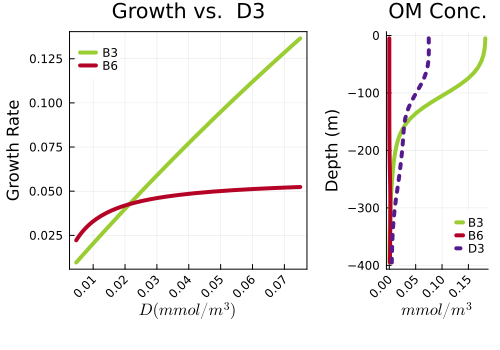

In [31]:
plot_growth_over_D([growthB[3], growthB[6]], [Bw[:,3], Bw[:,6]], Dw[:,3], [" B3", " B6"], " D3")

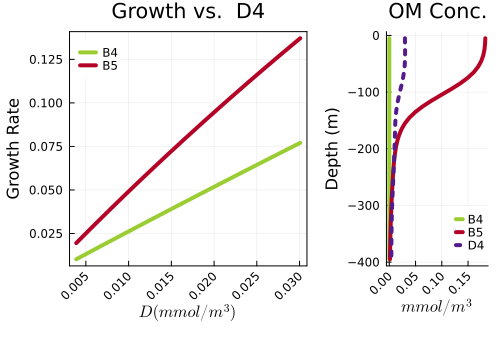

In [32]:
plot_growth_over_D([growthB[4], growthB[5]], [Bw[:,4], Bw[:,5]], Dw[:,4], [" B4", " B5"], " D4")

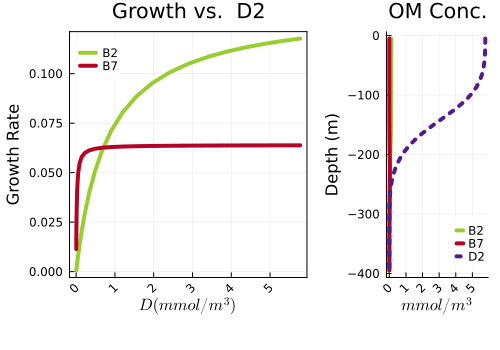

In [33]:
plot_growth_over_D([growthB[2], growthB[7]], [Bw[:,2], Bw[:,7]], Dw[:,2], [" B2", " B7"], " D2")

In [ ]:
winter = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/Wi100y_8P6Z13B5D_230915_00:03.nc")
summer = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/Su100y_8P6Z13B5D_230915_17:36.nc")

In [35]:
# Get endpoints 
Nw, Pw, Zw, Bw, Dw = get_endpoints(winter, ["n", "p", "z", "b", "d"])
Ns, Ps, Zs, Bs, Ds = get_endpoints(summer, ["n", "p", "z", "b", "d"])

([16.452809087970625; 16.463145623320294; … ; 22.921716587146044; 22.921744412890767;;], [7.742365969644975e-305 0.34386186844696287 … 1.2239283599933451e-304 0.3450658428278331; 7.7110252508183e-305 0.3417214501088663 … 1.2189532899578601e-304 0.3431232967998041; … ; 2.2239148082494108e-305 3.3812347358088262e-22 … 2.2245056106182003e-305 3.609216895016305e-22; 2.2246893073734994e-305 3.338991453125905e-22 … 2.223991995568817e-305 3.5641253293700023e-22], [0.10437568742949756 0.05981828414435703 … 0.039057652973974386 0.07206900102405836; 0.10420175852440287 0.059723811219828914 … 0.03902904366937884 0.07200269094837859; … ; 3.232969198418552e-9 2.2321937201395375e-9 … 6.395082199074291e-9 8.805347525406532e-9; 3.2288841712973193e-9 2.2293732259075436e-9 … 6.38711379885691e-9 8.794536618038154e-9], [0.0957605749566168 0.0412214814223952 … 4.997314386653735e-153 0.07446416726494036; 0.09579884127647556 0.041169438254518465 … 5.025341229200574e-153 0.07430965400606103; … ; 0.00452521782

In [36]:
growthB = calc_growthB(Bw, Dw, winter, "Win")

13-element Vector{Any}:
 [0.0063231917859304905, 0.006793507914102515, 0.0073299585694101875, 0.007926891011827907, 0.008572009964570805, 0.009245307275985055, 0.009919078420457788, 0.01056058510450388, 0.011137585917344036, 0.01162502099146166  …  0.11952428797129473, 0.1348140107524842, 0.15032173779926047, 0.1658165271088313, 0.18109366668180596, 0.19598053723989708, 0.21033889118579638, 0.22406428677536258, 0.23708352583656478, 0.2493508925893634]
 [0.05174471454234373, 0.051735968010634986, 0.051706326395937446, 0.051635121203624026, 0.05148890925440169, 0.05121524376307553, 0.05073334154098529, 0.04992111546435854, 0.0485971979699666, 0.046500504011637286  …  0.03540284083926127, 0.035737396185697524, 0.036017359694998446, 0.03624696313736529, 0.036430613654950046, 0.03657280309635818, 0.03667802646432788, 0.03675070896741669, 0.03679514160912888, 0.036815425541626416]
 [0.04380623897164118, 0.043905369233316865, 0.04405327436629603, 0.04415005670799572, 0.04403703426311514, 0.04

In [9]:
CMd = display(winter["CM"][:])

5×13 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0

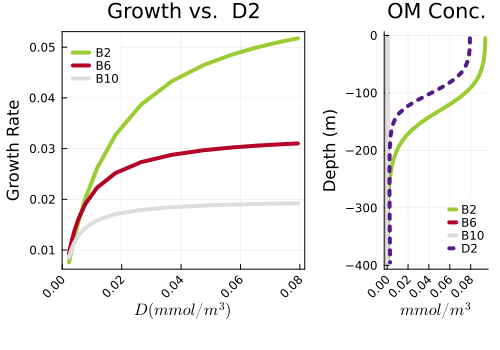

In [37]:
plot_growth_over_D([growthB[2], growthB[6], growthB[10]], [Bw[:,2], Bw[:,6], Bw[:,10]], Dw[:,2], [" B2", " B6", " B10"], " D2")

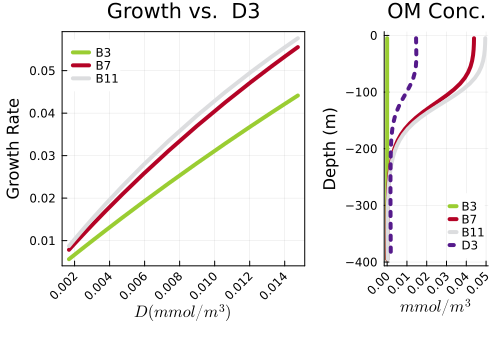

In [38]:
plot_growth_over_D([growthB[3], growthB[7], growthB[11]], [Bw[:,3], Bw[:,7], Bw[:,11]], Dw[:,3], [" B3", " B7", " B11"], " D3")

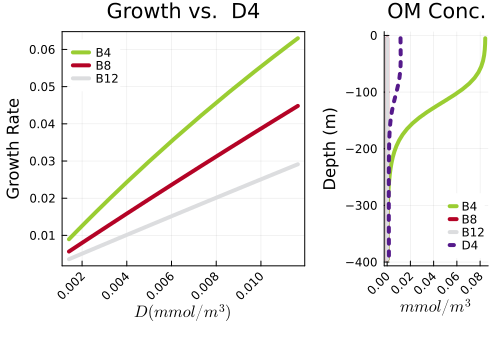

In [39]:
plot_growth_over_D([growthB[4], growthB[8], growthB[12]], [Bw[:,4], Bw[:,8], Bw[:,12]], Dw[:,4], [" B4", " B8", " B12"], " D4")

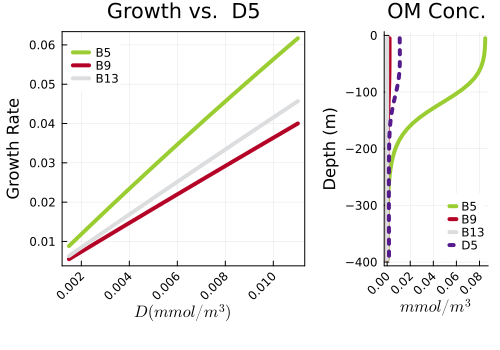

In [40]:
plot_growth_over_D([growthB[5], growthB[9], growthB[13]], [Bw[:,5], Bw[:,9], Bw[:,13]], Dw[:,5], [" B5", " B9", " B13"], " D5")

In [143]:
function calc_growthP(P, N, ds, season)

    II, JJ = get_nonzero_axes(ds["CMp"][:])
    umax = ds["umax_ij"][:]
    Kp = ds["Kp_ij"][:]

    growth = Any[]

    for j = axes(II, 1)
        uptake =  umax[II[j],JJ[j]] .* N ./ (N .+ Kp[II[j],JJ[j]])
        push!(growth, uptake)
    end

    return growth

end

calc_growthP (generic function with 1 method)

In [144]:
growthP = calc_growthP(Pw, Nw, winter, "Win")

4-element Vector{Any}:
 [0.24424568315744719; 0.24424640705719738; … ; 0.2445786485741335; 0.24457864895270942;;]
 [0.3589846062631827; 0.3589901466149615; … ; 0.36154761839230765; 0.36154762132321816;;]
 [0.22634100889511496; 0.2263415696213891; … ; 0.2265988633591336; 0.2265988636522441;;]
 [0.32114305550315325; 0.32114542580362077; … ; 0.32223551516552645; 0.32223551641016285;;]

In [ ]:
function plot_growth_over_N(growth1, growth2, biomass1, biomass2, R, lb, R_str)

    depth = 200
    dz = Int(depth/10)
    zc = get_zc(depth)
    l = @layout [a{0.9h} b{0.3w}]

    p1 = plot(R[1:dz], growth1[1:dz], lw=4, lc="olivedrab3", label=lb[1], ylabel="Growth Rate", xrotation=45, 
        xlabel=L" D (mmol/m^3)", border=:box, title="Growth vs. $R_str")
        plot!(R[1:dz], growth2[1:dz], lw=4, lc="red3", label=lb[2])

    p2 = plot(R[1:dz], -zc, lw=4, lc="darkgreen", ls=:dot, label="$R_str", xrotation=45, xlabel=L"mmol/m^3", ylabel="Depth (m)")
    plot!(biomass1[1:dz], -zc, lw=4, lc="olivedrab3", label=lb[1], title="OM Conc.")
    plot!(biomass2[1:dz], -zc, lw=4, lc="red3", label=lb[2])

    f = plot(p1, p2,
    fg_legend = :transparent,
    size=(600,450),
    layout = l,
    )

    return f

end